In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [143]:
train = pd.read_csv('Train.csv')
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [144]:
train.BiasInfluentialFactor.value_counts(dropna=False)

NaN                   3336
DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [146]:
train.BiasInfluentialFactor.fillna('NotPresent',inplace=True)

In [147]:
for i in train.columns:
    print(f'{train[i].nunique()}          {i}')

13645          EmpID
1766          EmpName
3          LanguageOfCommunication
19          Age
3          Gender
9          JobProfileIDApplyingFor
8          HighestDegree
6          DegreeBranch
3          GraduatingInstitute
7          LatestDegreeCGPA
12          YearsOfExperince
12          GraduationYear
25          CurrentCTC
31          ExpectedCTC
2          MartialStatus
5          EmpScore
8          CurrentDesignation
3          CurrentCompanyType
5          DepartmentInCompany
17          TotalLeavesTaken
10          BiasInfluentialFactor
4578          FitmentPercent


In [148]:
df = train.copy()
df = df.iloc[:,2:]

<Figure size 1800x1440 with 0 Axes>

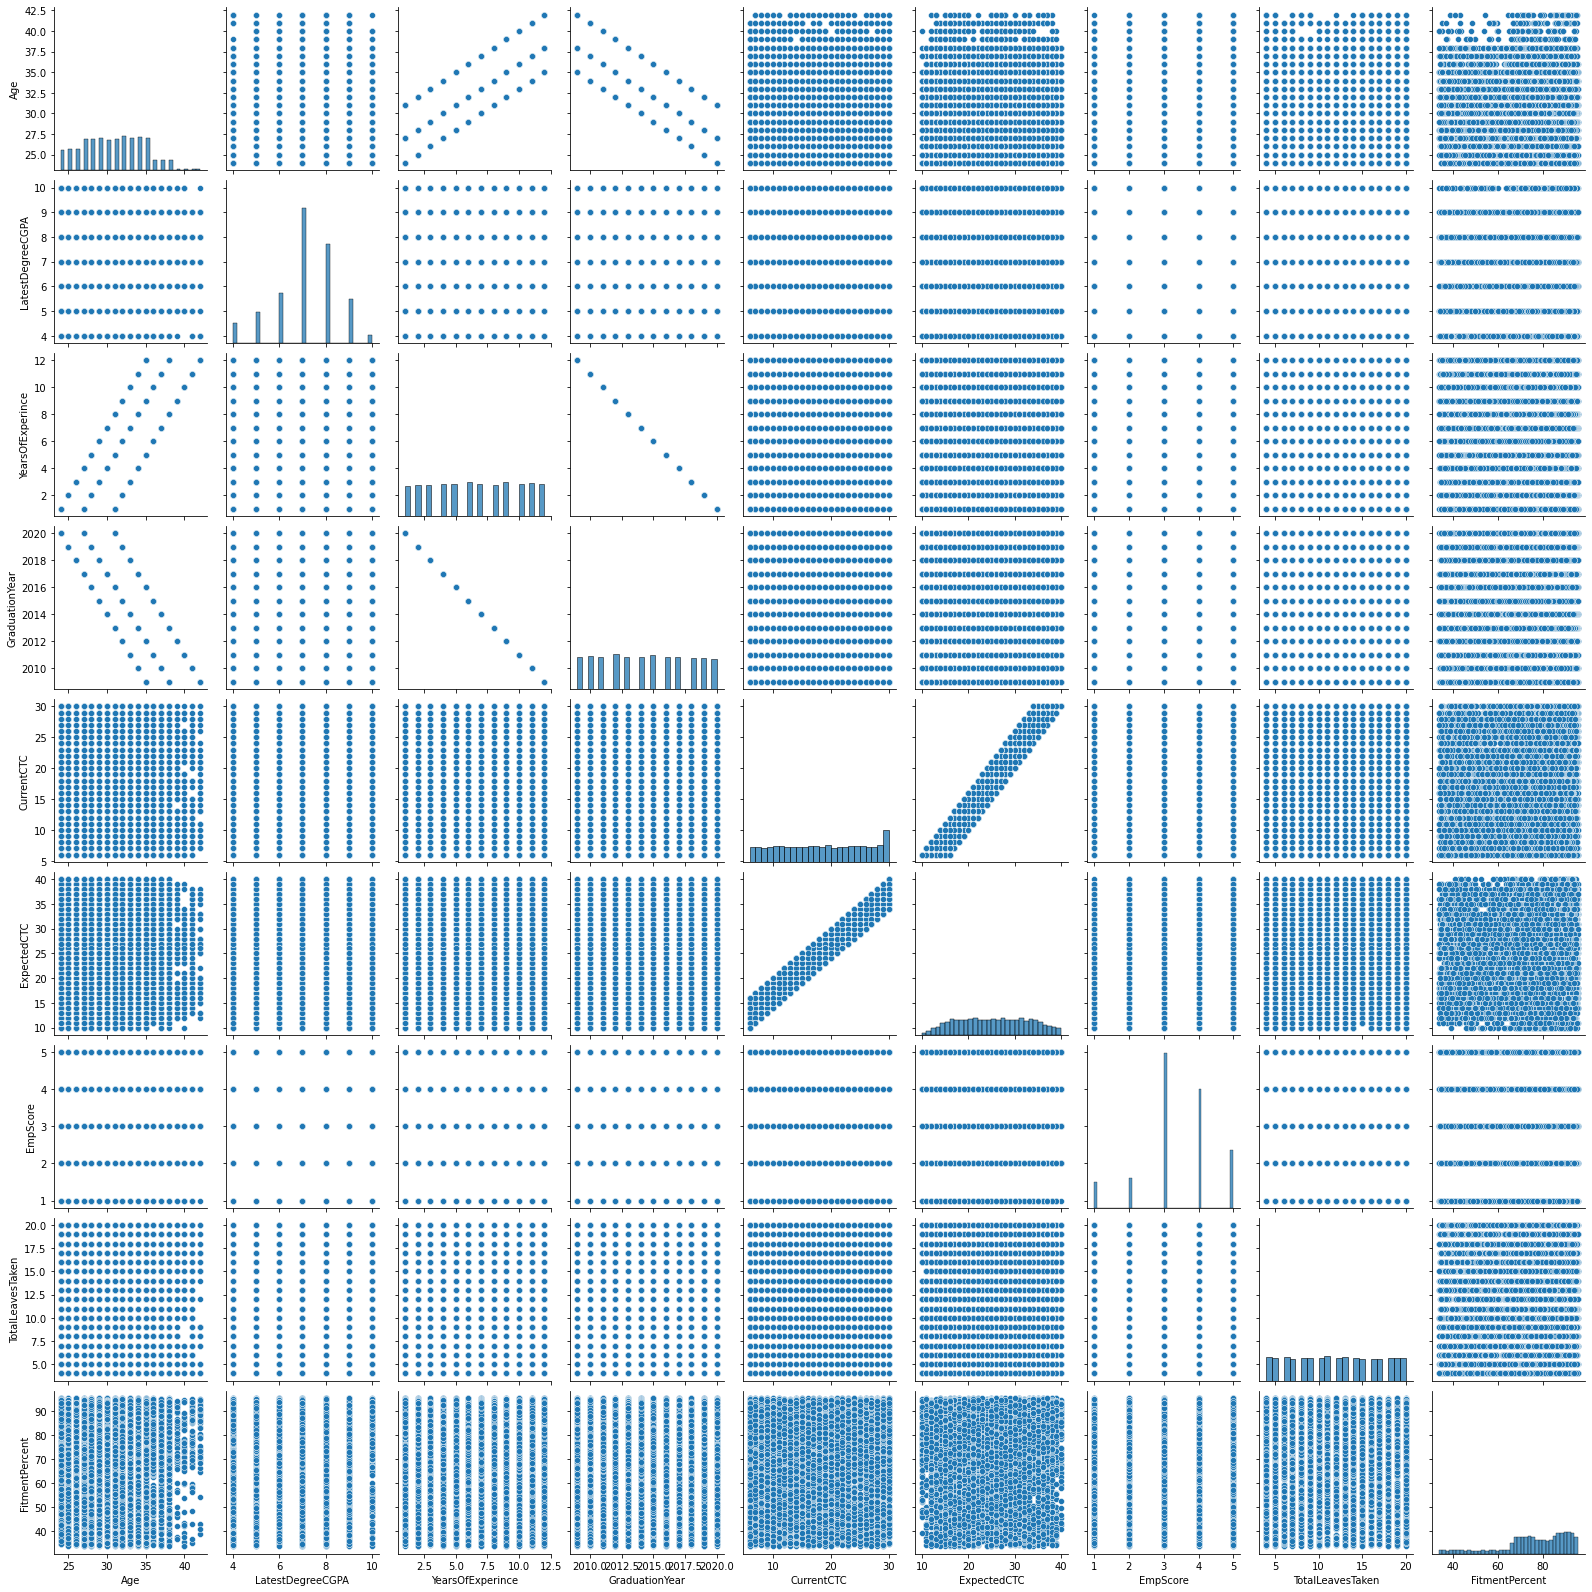

In [150]:
plt.figure(figsize=(25,20))
sns.pairplot(df)

<AxesSubplot:>

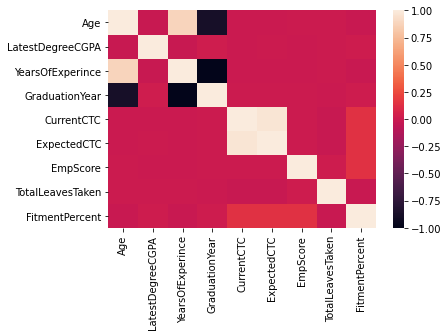

In [151]:
sns.heatmap(df.corr())

In [152]:
df =df.drop(['CurrentCTC','GraduationYear','Age'],axis=1)

<AxesSubplot:>

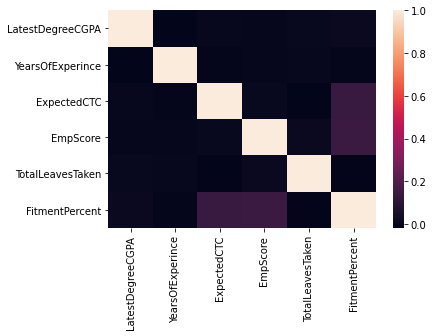

In [153]:
sns.heatmap(df.corr())

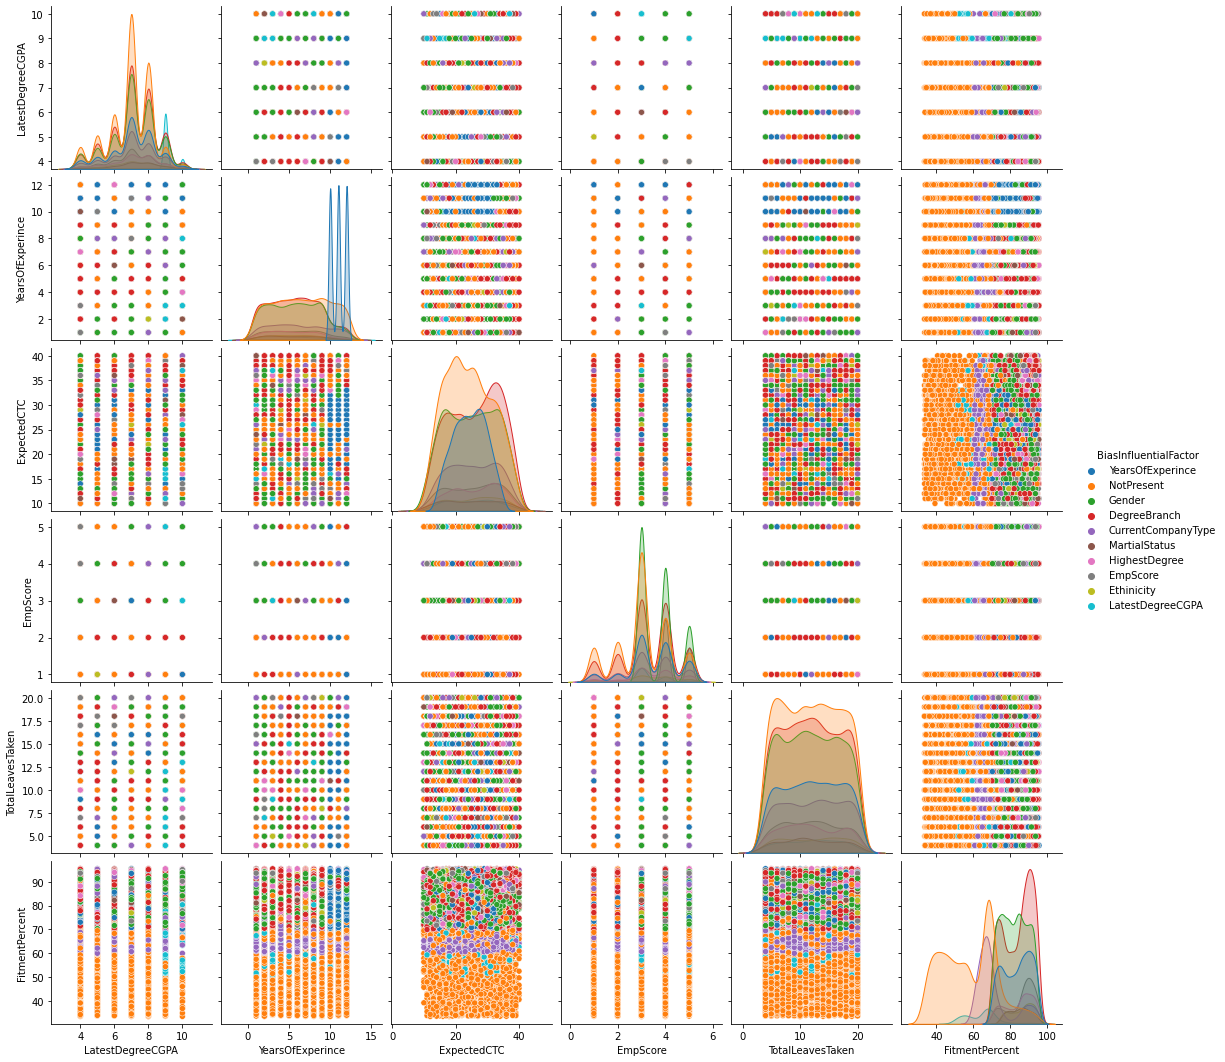

In [154]:
# plt.figure(figsize=(25,20))
sns.pairplot(df,hue='BiasInfluentialFactor')

In [187]:
jj = df[df.JobProfileIDApplyingFor.isin(['JR85289', 'JR87525'])]
jj.head()

,LanguageOfCommunication,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,English,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,19,Married,5,BA,MidSized,Engineering,6,NotPresent,67.09
2,English,Female,JR87525,PhD,Computer Science,Tier 1,6,6,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,English,Female,JR87525,BCA,Information Technology,Tier 2,5,6,24,Married,5,SDE,Startup,Product,16,Gender,72.29
6,Hindi,Male,JR85289,PhD,Computer Science,Tier 1,7,1,21,Single,3,SDE,Enterprise,Customer Success,8,CurrentCompanyType,62.29


<AxesSubplot:xlabel='JobProfileIDApplyingFor', ylabel='FitmentPercent'>

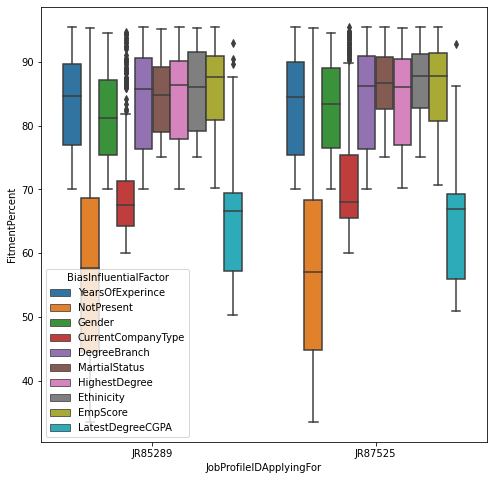

In [189]:
plt.figure(figsize=(8,8))
sns.boxplot(jj.JobProfileIDApplyingFor,jj.FitmentPercent,hue=jj.BiasInfluentialFactor)

<AxesSubplot:xlabel='LatestDegreeCGPA', ylabel='FitmentPercent'>

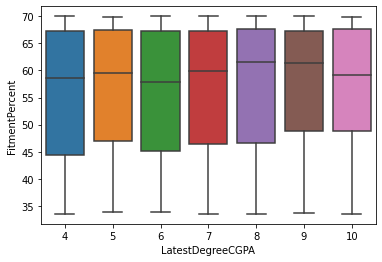

In [162]:
sns.boxplot('LatestDegreeCGPA','FitmentPercent',data = df[df.FitmentPercent<70])

<AxesSubplot:xlabel='CurrentCompanyType', ylabel='FitmentPercent'>

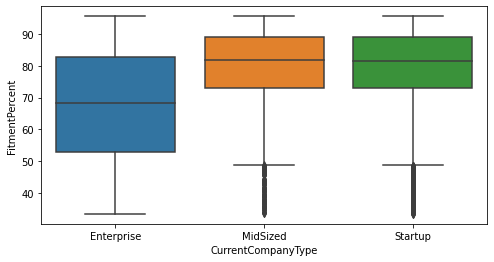

In [208]:
plt.figure(figsize=(8,4))
sns.boxplot(df.CurrentCompanyType,df.FitmentPercent)

In [198]:
df.DegreeBranch.unique()

array(['Electrical', 'Artificial Intelligence', 'Computer Science',
       'Information Technology', 'Electronics',
       'Electrical and Electronics'], dtype=object)

In [206]:
kk = df[df.DegreeBranch.isin(['Computer Science','Information Technology','Artificial Intelligence'])]

<AxesSubplot:xlabel='Gender', ylabel='count'>

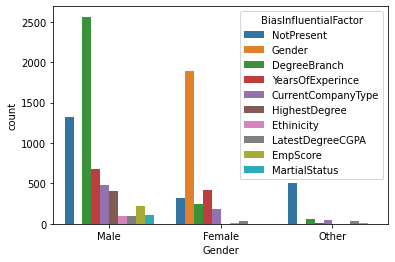

In [207]:
sns.countplot(kk.Gender,hue=kk.BiasInfluentialFactor)

<AxesSubplot:xlabel='Gender', ylabel='FitmentPercent'>

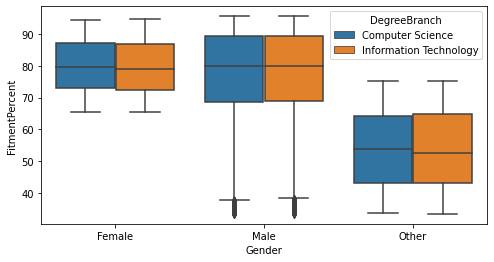

In [204]:
plt.figure(figsize=(8,4))
sns.boxplot(kk.Gender,kk.FitmentPercent,hue=kk.DegreeBranch)

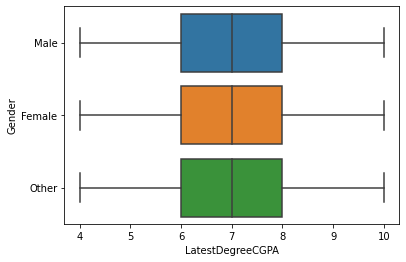

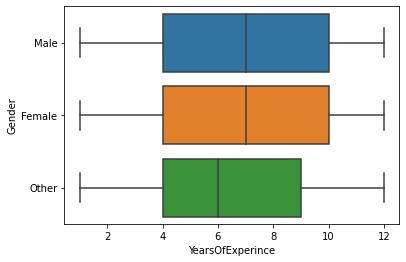

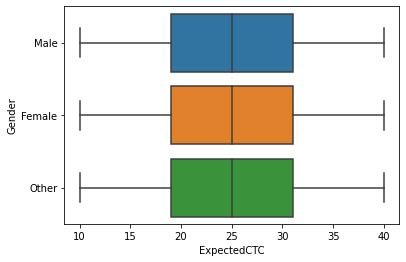

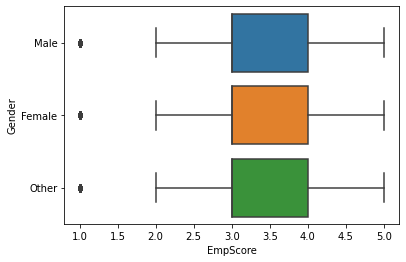

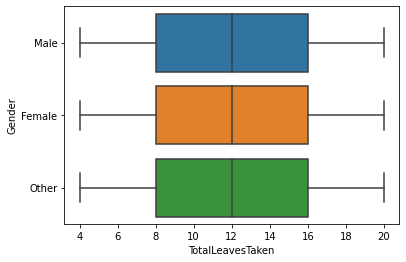

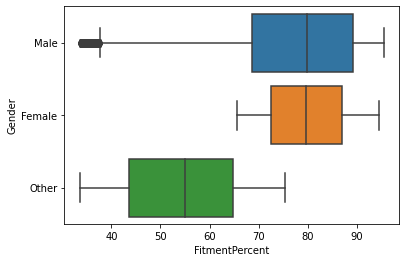

In [174]:
cols = np.where(sp.dtypes!='object')[0]
for i in cols:
    sns.boxplot(df.iloc[:,i],df.Gender)
    plt.show()

In [163]:
df.columns

Index(['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [177]:
jj = df[df.BiasInfluentialFactor=='NotPresent']
jj.Gender.value_counts()

Male      2094
Other      722
Female     520
Name: Gender, dtype: int64

In [120]:
sp = df
len(sp)

13645

In [121]:
sp.loc[sp.BiasInfluentialFactor!='None','BiasInfluentialFactor'] = 'All'

In [127]:
sp.loc[sp.BiasInfluentialFactor=='None','BiasInfluentialFactor'] = 'N'

<AxesSubplot:xlabel='BiasInfluentialFactor', ylabel='FitmentPercent'>

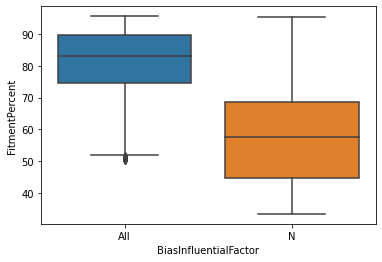

In [209]:

sns.boxplot(sp.BiasInfluentialFactor,sp.FitmentPercent)

In [123]:
sp.columns

Index(['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

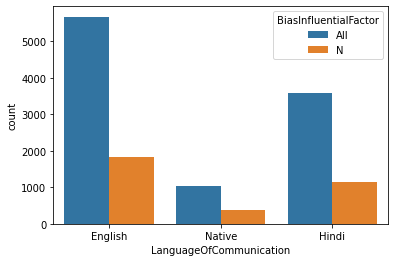

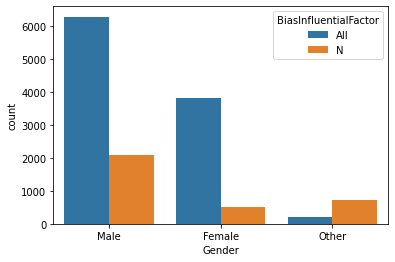

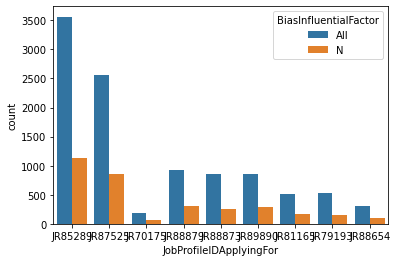

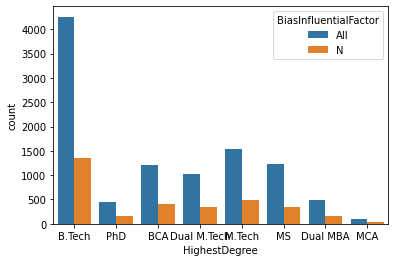

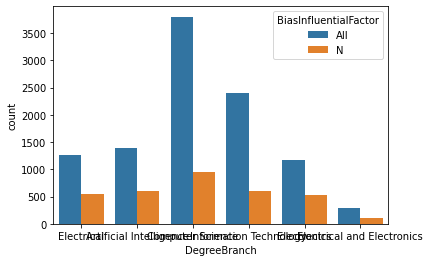

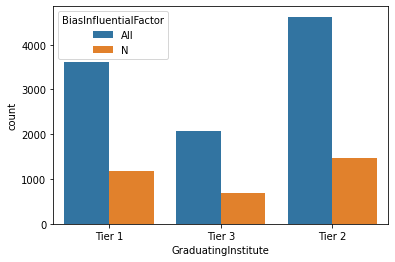

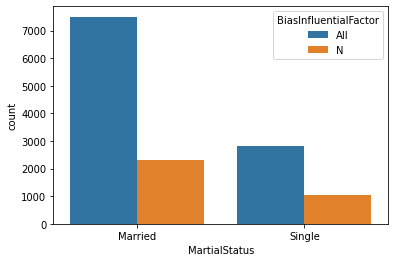

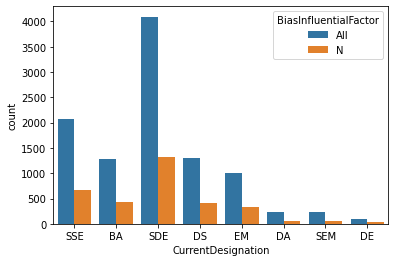

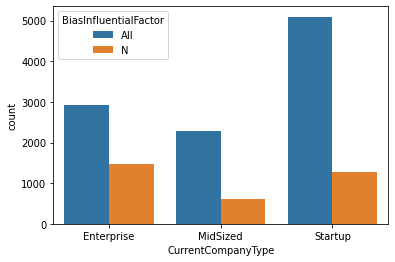

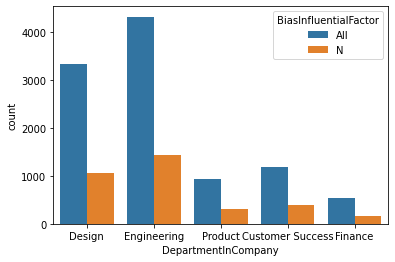

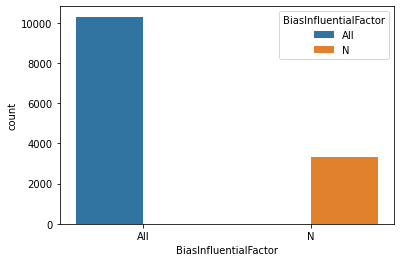

In [137]:
cols = np.where(sp.dtypes=='object')[0]
for i in cols:
    sns.countplot(sp.iloc[:,i],hue=sp.BiasInfluentialFactor)
    plt.show()

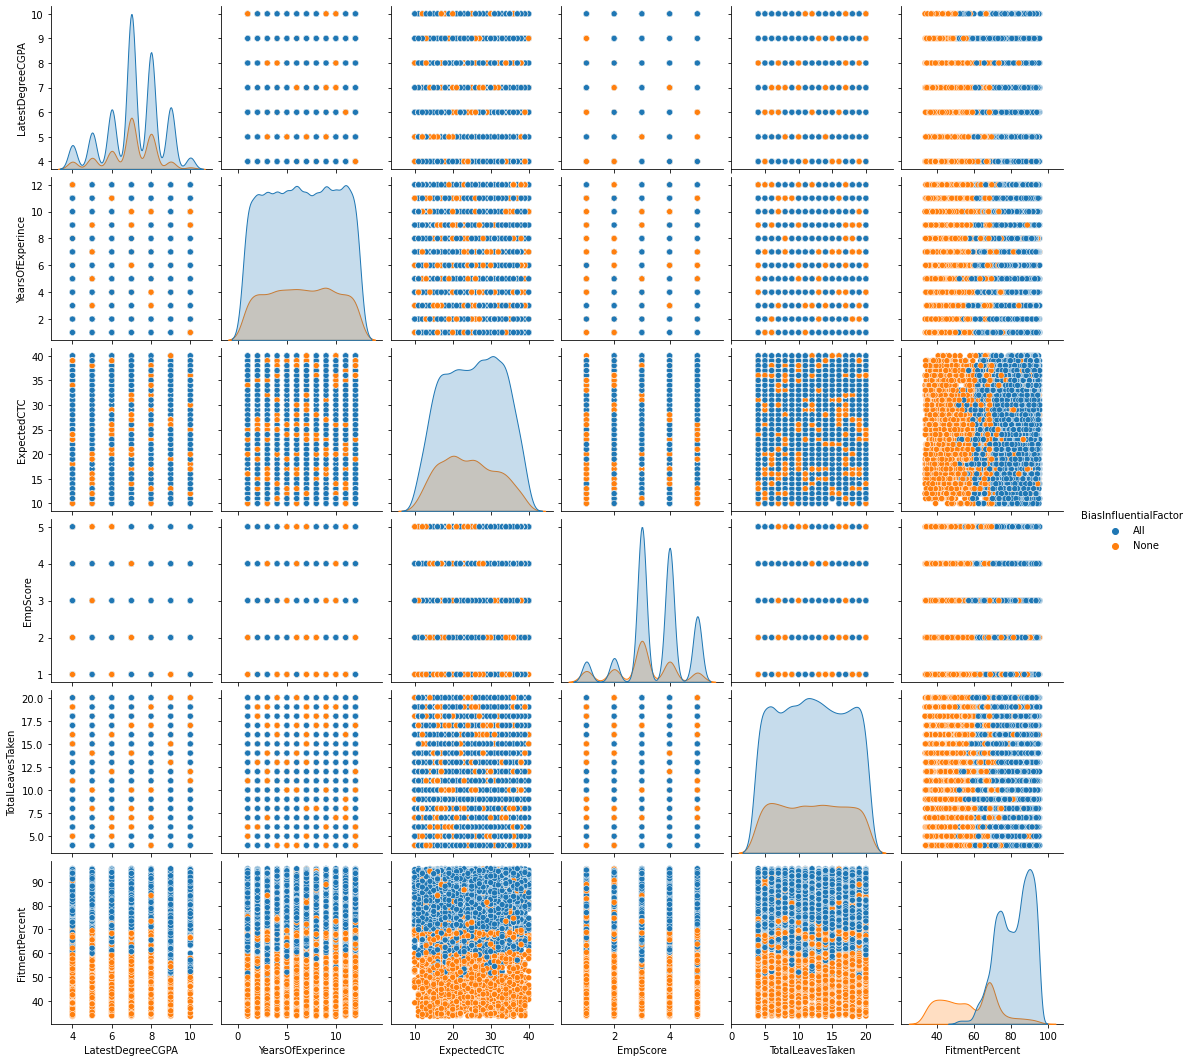

In [125]:

sns.pairplot(sp,hue='BiasInfluentialFactor')